# Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

csv_file_path = os.getenv('HOME') + '/aiffel/data_preprocess/data/trade.csv'
trade = pd.read_csv(csv_file_path)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,기타사항
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,NaN
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,NaN
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,NaN
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,NaN
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,NaN


# Checking Missing data

    There are two primary approaches for managing missing data within datasets:

#### Data Exclusion: 

    removal of observations or records containing missing values. 

#### Data Imputation: 
    
    process of filling in missing values with appropriate estimates or substitutes. 
    
    Imputation methods can range from simple techniques like mean or median imputation to more sophisticated methods like regression-based imputation or machine learning algorithms.
    


In [3]:
print(len(trade))

199


In [4]:
print('컬럼별 결측치 개수')
len(trade) - trade.count()

컬럼별 결측치 개수


기간        0
국가명       0
수출건수      3
수출금액      4
수입건수      3
수입금액      3
무역수지      4
기타사항    199
dtype: int64

In [5]:
# dropped the column '기타사항' because the contents of that are all considered missing value, 

trade = trade.drop('기타사항', axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0


In [7]:
trade.isnull()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False
195,False,False,False,False,False,False,False
196,False,False,True,True,True,True,True
197,False,False,True,True,True,True,True


In [10]:
# axis = 1: by row
# axis = 0: by column
trade.isnull().any(axis=1)

0      False
1      False
2      False
3      False
4      False
       ...  
194    False
195    False
196     True
197     True
198     True
Length: 199, dtype: bool

In [11]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN
196,2020년 06월,중국,NaN,NaN,NaN,NaN,NaN
197,2020년 06월,미국,NaN,NaN,NaN,NaN,NaN
198,2020년 06월,일본,NaN,NaN,NaN,NaN,NaN


In [12]:
# If "all" the values of designated "subset columns" are "NaN", drop those rows "permanently".

trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)


In [13]:
trade[trade.isnull().any(axis=1)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,NaN,1141118.0,5038739.0,NaN


### Methods for augmenting missing numeric data:

#### Constant Value Imputation: 
    One approach is to replace missing numeric values with a specific constant. However, when a substantial portion of the data is missing, utilizing the same constant for all missing values may inadvertently reduce the observed variance in the dataset.

#### Central Tendency Imputation: 
    Missing numeric data can be imputed with statistical measures like the mean or median of the available values. Similar to constant imputation, this method may lead to underestimated variability in cases of extensive missing data.

#### Predictive Modeling Imputation: 
    Employing predictive models, such as machine learning algorithms, to estimate missing values based on the relationships within the dataset. This approach can be especially effective when there is substantial missing data, as it leverages the available information to make informed predictions.

#### Time Series Interpolation: 
    When dealing with time series data, gaps in numeric values can be filled by considering adjacent time points. For example, in temperature sensor data, missing values can be interpolated by averaging the neighboring values in the time series.

### For the categorical data:

#### Categorical Labeling: 
    An option is to designate a specific category, such as 'Other' or 'Missing,' to substitute for missing categorical values.

#### Mode Imputation: 
    Categorical missing values can be replaced with the mode, i.e., the most frequently occurring category. However, in cases of a high proportion of missing data, using alternative methods is advisable to prevent an overrepresentation of the mode.

#### Predictive Modeling Imputation: 
    Similar to numeric data, categorical missing values can be estimated using predictive models based on the characteristics of the dataset.

#### Time-Dependent Interpolation: 
    For categorical data exhibiting temporal patterns, like a person's occupation over time, missing values can be inferred from adjacent time points. If the occupation in the preceding and succeeding years matches, the missing value can be filled with that common occupation. If they differ, a choice can be made between the two based on predefined criteria.

#### Using Time series interpolation for Numerical data

In [14]:
trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
188,2020년 03월,미국,97117.0,7292838.0,1368345.0,5388338.0,1904500.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


In [15]:
trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,NaN


In [16]:
trade.loc[191, '무역수지'] = (trade.loc[188, "무역수지"]+ trade.loc[194, "무역수지"])/2
trade.loc[[191]]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5


# Duplicates

In [17]:
trade.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
191    False
192    False
193    False
194    False
195    False
Length: 196, dtype: bool

In [18]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [19]:
trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
186,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0
187,2020년 03월,중국,248059.0,10658599.0,358234.0,8948918.0,1709682.0


In [20]:
trade.drop_duplicates(inplace=True)

In [22]:
trade[trade.duplicated()]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


#### Another example

In [21]:
df = pd.DataFrame({'id':['001', '002', '003', '004', '002'], 
                   'name':['Park Yun', 'Kim Sung', 'Park Jin', 'Lee Han', 'Kim Min']})
df

,id,name
0,001,Park Yun
1,002,Kim Sung
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


In [23]:
df.drop_duplicates(subset = 'id', keep = 'last')

,id,name
0,001,Park Yun
2,003,Park Jin
3,004,Lee Han
4,002,Kim Min


# Outlier

### Methods for identifying outlier
    1. z-score
    2. IQR

Image(z-score)

#### z-score 

    limitation:
    
    1. The mean and standard deviation are already greatly affected by outliers.
        
    2. It is difficult to find out for small datasets.

In [47]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index


In [50]:
# In the dataframe "trade"
# out of column '무역수지'
# display the rows which are above the z-score of 1.5

trade.loc[outlier(trade, '무역수지', 1.5)]


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
6,2015년 03월,중국,117529.0,11868032.0,234321.0,7226911.0,4641121.0
75,2017년 02월,중국,159062.0,11118131.0,188555.0,6600637.0,4517495.0
80,2017년 03월,일본,65093.0,2395932.0,165734.0,5157589.0,-2761657.0
96,2017년 09월,중국,183442.0,13540683.0,295443.0,8443414.0,5097269.0
99,2017년 10월,중국,137873.0,12580474.0,244977.0,7932403.0,4648071.0
101,2017년 10월,일본,63510.0,1847999.0,127696.0,4418583.0,-2570584.0
102,2017년 11월,중국,421194.0,14000887.0,307790.0,9253318.0,4747569.0
105,2017년 12월,중국,218114.0,13848364.0,290347.0,8600132.0,5248232.0
114,2018년 03월,중국,232396.0,13576667.0,267249.0,8412516.0,5164151.0
116,2018년 03월,일본,80142.0,2603450.0,159601.0,5226141.0,-2622691.0


In [51]:
# not_outlier() function
def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<z].index


In [52]:
trade.loc[not_outlier(trade, '무역수지', 1.5)]

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0
...,...,...,...,...,...,...,...
191,2020년 04월,미국,105360.0,5946782.0,1141118.0,5038739.0,1109176.5
192,2020년 04월,일본,134118.0,1989323.0,141207.0,3989562.0,-2000239.0
193,2020년 05월,중국,185320.0,10746069.0,349007.0,8989920.0,1756149.0
194,2020년 05월,미국,126598.0,4600726.0,1157163.0,4286873.0,313853.0


#### IQR

In [53]:
# Making arbitrary data containing outlier

np.random.seed(2020)
data = np.random.randn(100)  # 평균 0, 표준편차 1의 분포에서 100개의 숫자를 샘플링한 데이터 생성
data = np.concatenate((data, np.array([8, 10, -3, -5])))      # [8, 10, -3, -5])를 데이터 뒤에 추가함
data

array([-1.76884571,  0.07555227, -1.1306297 , -0.65143017, -0.89311563,
       -1.27410098, -0.06115443,  0.06451384,  0.41011295, -0.57288249,
       -0.80133362,  1.31203519,  1.27469887, -1.2143576 ,  0.31371941,
       -1.44482142, -0.3689613 , -0.76922658,  0.3926161 ,  0.05729383,
        2.08997884,  0.04197131, -0.04834072, -0.51315392, -0.08458928,
       -1.21545008, -1.41293073, -1.48691055,  0.38222486,  0.937673  ,
        1.77267804,  0.87882801,  0.33171912, -0.30603567,  1.24026615,
       -0.21562684,  0.15592948,  0.09805553,  0.83209585,  2.04520542,
       -0.31681392, -1.31283291, -1.75445746,  0.10209408, -1.36150208,
        0.48178488, -0.20832874, -0.09186351,  0.70268816,  0.10365506,
        0.62123638,  0.95411497,  2.03781352, -0.48445122,  0.2071549 ,
        1.64424216, -0.4882074 , -0.01782826,  0.46891556,  0.27987266,
       -0.64664972, -0.54406002, -0.16008985,  0.03781172,  1.03383296,
       -1.23096117, -1.24673665,  0.29572055,  2.1409624 , -0.92

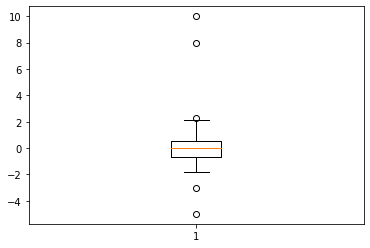

In [54]:
fig, ax = plt.subplots()
ax.boxplot(data)
plt.show()

In [55]:
Q3, Q1 = np.percentile(data, [75 ,25])
IQR = Q3 - Q1
IQR

1.1644925829790964

In [56]:
data[(Q1-1.5*IQR > data)|(Q3+1.5*IQR < data)]

array([ 2.31256634,  8.        , 10.        , -3.        , -5.        ])

In [57]:
# Q. 사분위 범위수를 이용해서 이상치를 찾는 outlier2() 함수를 구현해보세요.
def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75,25])
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5 * IQR)|(Q3 + 1.5 * IQR < df[col])]

outlier2(trade, '무역수지')


,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지


# Normalization

#### Standardization
    
    The mean of the data is converted to 0 and the variance is converted to 1.
        
    Standardization is usually used when the mean is 0 and the standard deviation is 1. Therefore, it is useful when the data follows a Gaussian distribution.
    
#### Min-Max Scaling

    The minimum value of the data is converted to 0 and the maximum value is converted to 1.
    
    Min-Max Scaling is mainly used when the range of features is different and is useful when the probability distribution is unknown.
    
#### If the train data and test data are divided, the test data must be normalized according to the same standard as the train data was normalized.

#### Standardization

In [58]:
# trade 데이터를 standardization 기법으로 정규화합니다. 
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()
trade_standardization.head()

,수출건수,수출금액,수입건수,수입금액,무역수지
0,-0.007488,1.398931,-0.163593,1.283660,1.255899
1,-0.689278,-0.252848,0.412529,-0.964444,0.400646
2,-0.847838,-1.091156,-0.993148,-0.863844,-1.098217
3,-0.417598,0.852853,-0.576399,0.705292,0.831767
4,-0.764918,-0.389673,0.146306,-1.276341,0.437586


In [59]:
trade_standardization.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02,1.950000e+02
mean,-1.093143e-16,6.832142e-17,1.821904e-17,-5.465713e-17,4.099285e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-9.194976e-01,-1.231761e+00,-9.984408e-01,-1.276341e+00,-1.604200e+00
25%,-5.937426e-01,-1.041338e+00,-7.673625e-01,-7.911669e-01,-1.117203e+00
50%,-4.373265e-01,-1.564700e-01,-3.429346e-01,-4.137392e-01,1.422420e-01
75%,4.420459e-01,1.037200e+00,3.927781e-01,8.827841e-01,7.457220e-01
max,5.486317e+00,2.078416e+00,3.239068e+00,2.376092e+00,2.433663e+00


#### Min-Max Scaling

In [60]:
cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
trade_minmax = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())
trade_minmax.head()


,수출건수,수출금액,수입건수,수입금액,무역수지
0,0.142372,0.794728,0.197014,0.700903,0.708320
1,0.035939,0.295728,0.332972,0.085394,0.496512
2,0.011187,0.042477,0.001249,0.112938,0.125310
3,0.078351,0.629759,0.099597,0.542551,0.603281
4,0.024131,0.254394,0.270146,0.000000,0.505660


In [61]:
trade_minmax.describe()

,수출건수,수출금액,수입건수,수입금액,무역수지
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.143541,0.372113,0.235620,0.349450,0.397289
std,0.156108,0.302099,0.235988,0.273790,0.247656
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050853,0.057527,0.054532,0.132836,0.120608
50%,0.075271,0.324844,0.154691,0.236172,0.432516
75%,0.212548,0.685450,0.328311,0.591147,0.581972
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Standardization with Scikit-learn

    StandardScaler
    
    MinMaxScaler
    
below is an example of MinMaxScaler of Scikit-learn

In [66]:
from sklearn.preprocessing import MinMaxScaler
train = [[10, -10], [30, 10], [50, 0]]
test = [[0, 1]]
scaler = MinMaxScaler()

In [67]:
scaler.fit_transform(train)

array([[0. , 0. ],
       [0.5, 1. ],
       [1. , 0.5]])

In [68]:
scaler.transform(test)

array([[-0.25,  0.55]])

# One-Hot Encoding

    If machine learning or deep learning framework does not support categorical types, we need to apply one-hot encoding
    
    One-hot encoding is a method of creating binary features for each cateogory and setting only the corresponding features to 1 and the rest to 0

In [69]:
#trade 데이터의 국가명 컬럼 원본
print(trade['국가명'].head())  

# get_dummies를 통해 국가명 원-핫 인코딩
country = pd.get_dummies(trade['국가명'])
country.head()

0    중국
1    미국
2    일본
3    중국
4    미국
Name: 국가명, dtype: object


,미국,일본,중국
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0


In [70]:
trade = pd.concat([trade, country], axis=1)
trade.head()

,기간,국가명,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,중국,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,미국,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,일본,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,중국,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,미국,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


In [71]:
trade.drop(['국가명'], axis=1, inplace=True)
trade.head()

,기간,수출건수,수출금액,수입건수,수입금액,무역수지,미국,일본,중국
0,2015년 01월,116932.0,12083947.0,334522.0,8143271.0,3940676.0,0,0,1
1,2015년 01월,65888.0,5561545.0,509564.0,3625062.0,1936484.0,1,0,0
2,2015년 01월,54017.0,2251307.0,82480.0,3827247.0,-1575940.0,0,1,0
3,2015년 02월,86228.0,9927642.0,209100.0,6980874.0,2946768.0,0,0,1
4,2015년 02월,60225.0,5021264.0,428678.0,2998216.0,2023048.0,1,0,0


# Binning

In [72]:
# consider we have a salary data

salary = pd.Series([4300, 8370, 1750, 3830, 1840, 4220, 3020, 2290, 4740, 4600, 
                    2860, 3400, 4800, 4470, 2440, 4530, 4850, 4850, 4760, 4500, 
                    4640, 3000, 1880, 4880, 2240, 4750, 2750, 2810, 3100, 4290, 
                    1540, 2870, 1780, 4670, 4150, 2010, 3580, 1610, 2930, 4300, 
                    2740, 1680, 3490, 4350, 1680, 6420, 8740, 8980, 9080, 3990, 
                    4960, 3700, 9600, 9330, 5600, 4100, 1770, 8280, 3120, 1950, 
                    4210, 2020, 3820, 3170, 6330, 2570, 6940, 8610, 5060, 6370,
                    9080, 3760, 8060, 2500, 4660, 1770, 9220, 3380, 2490, 3450, 
                    1960, 7210, 5810, 9450, 8910, 3470, 7350, 8410, 7520, 9610, 
                    5150, 2630, 5610, 2750, 7050, 3350, 9450, 7140, 4170, 3090])


<AxesSubplot:>

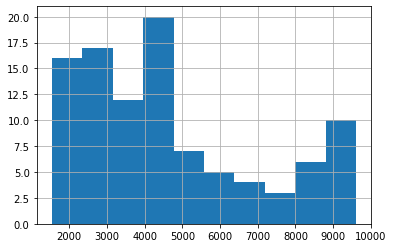

In [73]:
# visualization the data (histogram)
salary.hist()

#### manual binning

In [74]:
bins = [0, 2000, 4000, 6000, 8000, 10000]

In [75]:
ctg = pd.cut(salary, bins=bins)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [76]:
print(salary[0])
print(ctg[0])

4300
(4000, 6000]


In [77]:
ctg.value_counts()

(2000, 4000]     34
(4000, 6000]     29
(8000, 10000]    16
(0, 2000]        12
(6000, 8000]      9
dtype: int64

#### automatic binning (1)

In [78]:
# Q. 'bins' 옵션에 6을 입력해서 cut() 함수를 사용할 수도 있다.
pd.cut(salary,bins = 6)
ctg

0      (4000, 6000]
1     (8000, 10000]
2         (0, 2000]
3      (2000, 4000]
4         (0, 2000]
          ...      
95     (2000, 4000]
96    (8000, 10000]
97     (6000, 8000]
98     (4000, 6000]
99     (2000, 4000]
Length: 100, dtype: category
Categories (5, interval[int64, right]): [(0, 2000] < (2000, 4000] < (4000, 6000] < (6000, 8000] < (8000, 10000]]

In [79]:
# Q. 구간별로 값이 몇 개가 있는지 확인해봅시다.
ctg.value_counts().sort_index()

(0, 2000]        12
(2000, 4000]     34
(4000, 6000]     29
(6000, 8000]      9
(8000, 10000]    16
dtype: int64

#### automatic binning (2)

In [80]:
ctg = pd.qcut(salary, q=5)
ctg

0       (3544.0, 4648.0]
1       (7068.0, 9610.0]
2     (1539.999, 2618.0]
3       (3544.0, 4648.0]
4     (1539.999, 2618.0]
             ...        
95      (2618.0, 3544.0]
96      (7068.0, 9610.0]
97      (7068.0, 9610.0]
98      (3544.0, 4648.0]
99      (2618.0, 3544.0]
Length: 100, dtype: category
Categories (5, interval[float64, right]): [(1539.999, 2618.0] < (2618.0, 3544.0] < (3544.0, 4648.0] < (4648.0, 7068.0] < (7068.0, 9610.0]]

In [81]:
print(ctg.value_counts().sort_index())

(1539.999, 2618.0]    20
(2618.0, 3544.0]      20
(3544.0, 4648.0]      20
(4648.0, 7068.0]      20
(7068.0, 9610.0]      20
dtype: int64


# Visualization

    fig, ax = plt.subplots()
    ax.boxplot(data)
    plt.show()
-----------
    fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

    axs[0].scatter(x['A'], x['B'])
    axs[0].set_xlim(-5, 15)
    axs[0].set_ylim(-5, 5)
    axs[0].axvline(c='grey', lw=1)
    axs[0].axhline(c='grey', lw=1)
    axs[0].set_title('Original Data')
    
    axs[1].scatter(x_standardization['A'], x_standardization['B'])
    axs[1].set_xlim(-5, 5)
    axs[1].set_ylim(-5, 5)
    axs[1].axvline(c='grey', lw=1)
    axs[1].axhline(c='grey', lw=1)
    axs[1].set_title('Data after standardization')

    plt.show()
    
------

    fig, axs = plt.subplots(1,2, figsize=(12, 4),
                        gridspec_kw={'width_ratios': [2, 1]})

    axs[0].scatter(x['A'], x['B'])
    axs[0].set_xlim(-5, 15)
    axs[0].set_ylim(-5, 5)
    axs[0].axvline(c='grey', lw=1)
    axs[0].axhline(c='grey', lw=1)
    axs[0].set_title('Original Data')

    axs[1].scatter(x_min_max['A'], x_min_max['B'])
    axs[1].set_xlim(-5, 5)
    axs[1].set_ylim(-5, 5)
    axs[1].axvline(c='grey', lw=1)
    axs[1].axhline(c='grey', lw=5)
    axs[1].set_title('Data after min-max scaling')

    plt.show()

# Missing data

#### Checking data

    len(trade) - trade.count()
    
    trade.isnull()
    
    trade.isnull().any(axis=1)
    
    trade[trade.isnull().any(axis=1)]
    
    trade[(trade['국가명']=='미국')&((trade['기간']=='2020년 03월')|(trade['기간']=='2020년 05월'))]


#### Modifying data

    trade = trade.drop('기타사항', axis=1)

    trade.dropna(how='all', subset=['수출건수', '수출금액', '수입건수', '수입금액', '무역수지'], inplace=True)

    trade.loc[191, '수출금액'] = (trade.loc[188, '수출금액'] + trade.loc[194, '수출금액'] )/2
   
# Duplicates

#### Checking data
    trade.duplicated()
    
    trade[trade.duplicated()]
    
    trade[(trade['기간']=='2020년 03월')&(trade['국가명']=='중국')]

#### Modifying data

    trade.drop_duplicates(inplace=True)
    
    df.drop_duplicates(subset = 'id', keep = 'last')
    
    
# Outlier

#### 1. z-score
    
    def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index

    def not_outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])<z].index
   
    trade.loc[outlier(trade, '무역수지', 1.5)]

    
#### 2. IQR
    
    def outlier2(df, col):
    Q3, Q1 = np.percentile(df[col], [75,25])
    IQR = Q3 - Q1
    return df[(df[col] < Q1 - 1.5 * IQR)|(Q3 + 1.5 * IQR < df[col])]

    outlier2(trade, '무역수지')
    
# Normalization

#### Checking data

    trade_minmax.describe()
    trade_standardization.describe()

#### Standardization

    cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
    trade_standardization = (trade[cols]-trade[cols].mean())/trade[cols].std()


#### Min-Max Scaling

    cols = ['수출건수', '수출금액', '수입건수', '수입금액', '무역수지']
    trade_minmax = (trade[cols] - trade[cols].min()) / (trade[cols].max() - trade[cols].min())

#### Standardization with Scikit-learn

    StandardScaler
    MinMaxScaler

-----

    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()

    scaler.fit_transform(train)
    scaler.fit_transform(test)